In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

%load_ext autoreload
%autoreload 2

from classes.AndersonChain import AndersonChain
from classes.AndersonLattice import AndersonLattice
from classes.RandomGraph import RandomGraph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import networkx as nx
from classes.AndersonGraph import AndersonGraph
from plot_ipr import plot_ipr_evolution, plot_ipr_vs_W, plot_ipr_vs_p 

In [2]:
plt.style.use('dark_background')

## New Plots

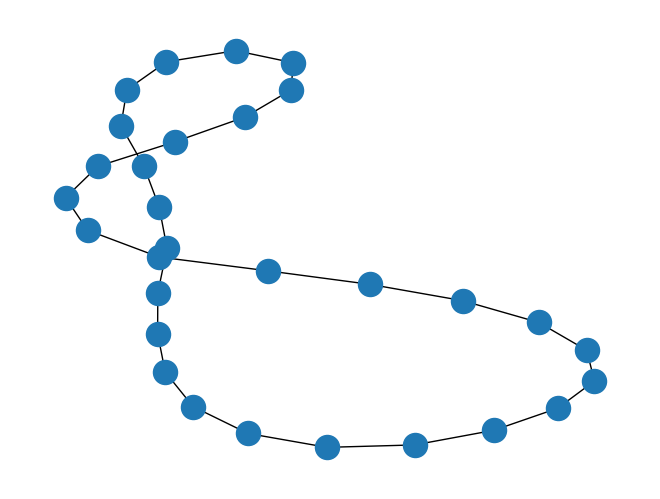

In [26]:
ring = nx.grid_graph(dim=[30], periodic=True)
nx.draw(ring)

# anderson_ring = AndersonGraph(graph=ring, psi_0=psi_0, eps_range=[-1, 1], t_hop=1)

0.19655080747716297


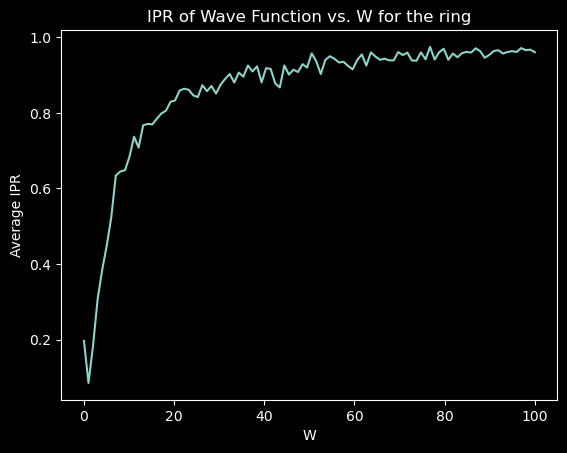

In [34]:
plot_ipr_vs_W(graph=ring, time=100, t_hop=1, W_max=100, num_trials=100, graph_name='ring')

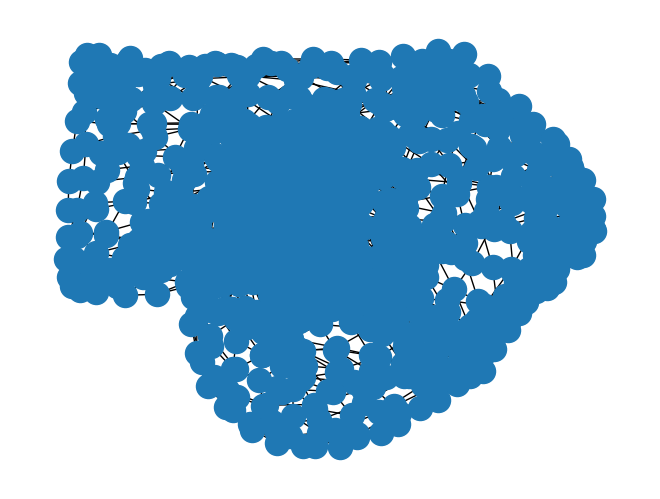

In [29]:
torus = nx.grid_graph(dim=[30, 30], periodic=True)
nx.draw(torus)

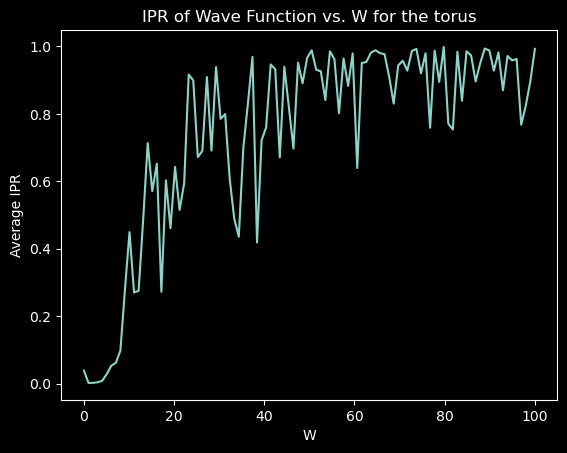

In [31]:
plot_ipr_vs_W(graph=torus, time=100, t_hop=1, W_max=100, num_trials=2, graph_name='torus')

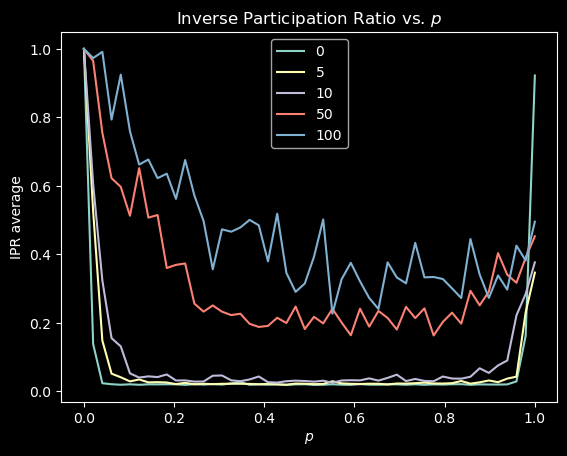

In [33]:
n = 100
psi_0 = np.zeros(n)
x = np.random.randint(n)
psi_0[x] = 1
p = 0.1

plot_ipr_vs_p(num_pts=50, num_sites=100, time=1000, W_vals=[0, 5, 10, 50, 100], psi_0=psi_0, t_hop=1, num_trials=10)

## 1D Lattice

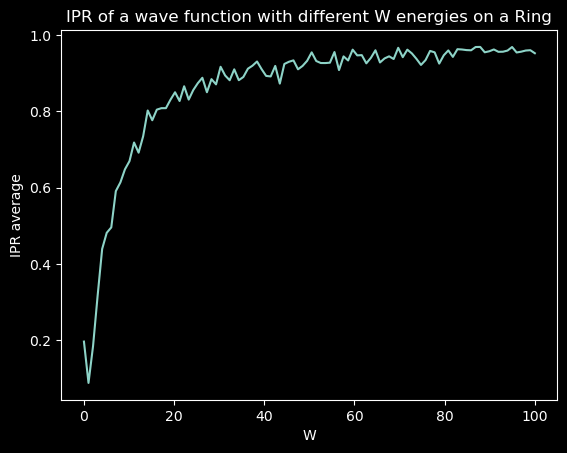

In [12]:
from statistics import mean

def magto4(psi):
    newpsi = []
    for x in psi:
        newpsi.append((abs(x))**4)
    return sum(newpsi)

def plotlocalization(ring, tmax):
    hist = ring.solve(tmax, tmax)
    T = np.linspace(0, tmax, tmax)
    localizationlist = []
    for vect in hist:
        localizationlist.append(magto4(vect))
    plt.title("Inverse Participation Ratio (measure of localization) of a wave function over time")
    plt.plot(T, localizationlist)

def localizationfordiffW_chain(Wmax, t, n, thop, num):
    Wlist = np.linspace(0, Wmax, Wmax)
    localizationmeasure = []
    for W in Wlist:
        IPRs = []
        for i in range(num):
            psi_0 = np.zeros(n)
            psi_0[np.random.randint(0, n)] = 1
            ring = AndersonChain(n, psi_0, [-1*W, W], thop)
            psi_t = ring.solveatt(t)
            IPRs.append(magto4(psi_t))
        localizationmeasure.append(mean(IPRs))
    plt.xlabel("W")
    plt.ylabel("IPR average")
    plt.title("IPR of a wave function with different W energies on a Ring")
    plt.plot(Wlist, localizationmeasure)

localizationfordiffW_chain(100, 100, 30, 1, 100)

## 2D Lattice

In [13]:
from statistics import mean

def magto4(psi):
    newpsi = []
    for x in psi:
        newpsi.append((abs(x))**4)
    return sum(newpsi)

def plotlocalization(torus, tmax):
    hist = torus.solve(tmax, tmax)
    T = np.linspace(0, tmax, tmax)
    localizationlist = []
    for vect in hist:
        localizationlist.append(magto4(vect))
    plt.title("Inverse Participation Ratio (measure of localization) of a wave function over time")
    plt.plot(T, localizationlist)

def localizationfordiffW(Wmax, t, n, thop, num):
    Wlist = np.linspace(0, Wmax, Wmax)
    localizationmeasure = []
    for W in Wlist:
        IPRs = []
        for _ in range(num):
            psi_0 = np.zeros(n**2)
            psi_0[np.random.randint(0, n**2)] = 1
            torus = AndersonLattice(n, psi_0, [-1*W, W], thop)
            psi_t = torus.solveatt(t)
            IPRs.append(magto4(psi_t))
        localizationmeasure.append(mean(IPRs))
    plt.xlabel("W")
    plt.ylabel("IPR average")
    plt.title("IPR of a wave function for different W energies on a Lattice")
    plt.plot(Wlist, localizationmeasure)

localizationfordiffW(100, 100, 30, 1, 100)

## Random Graph

### Varying W

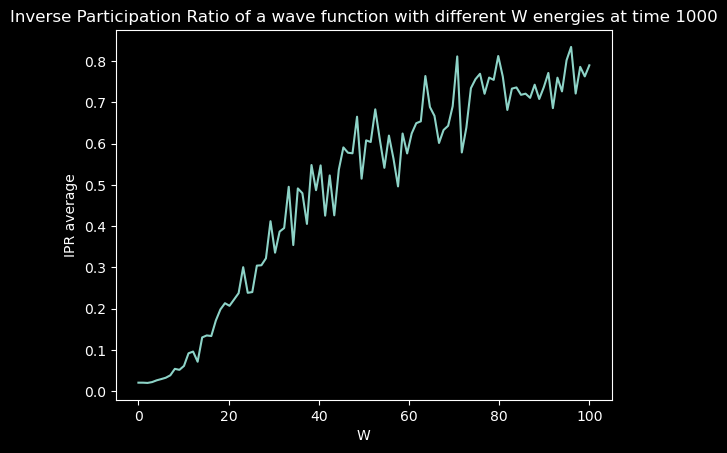

In [17]:
n = 100
psi_0 = np.zeros(n)
x = np.random.randint(n)
psi_0[x] = 1
W = 10
p = 0.1

def magto4(psi):
    newpsi = []
    for x in psi:
        newpsi.append((abs(x))**4)
    return sum(newpsi)

def plotlocalization(graph, tmax):
    hist = graph.solve(tmax, tmax)
    T = np.linspace(0, tmax, tmax)
    localizationlist = []
    for vect in hist:
        localizationlist.append(magto4(vect))
    plt.title("Inverse Participation Ratio (measure of localization) of a wave function over time")
    plt.plot(T, localizationlist)

def localizationfordiffW(Wmax, t, p, n, psi_0, thop, num):
    Wlist = np.linspace(0, Wmax, Wmax)
    localizationmeasure = []
    for W in Wlist:
        IPRs = []
        for _ in range(num):
            torus = RandomGraph(p, n, psi_0, [-1*W, W], thop)
            psi_t = torus.solveatt(t)
            IPRs.append(magto4(psi_t))
        localizationmeasure.append(mean(IPRs)) 
    plt.xlabel("W")
    plt.ylabel("IPR average")
    plt.title("Inverse Participation Ratio of a wave function with different W energies")
    plt.plot(Wlist, localizationmeasure)

def localizationfordiffp(prange, pnum, t, n, W, psi_0, thop):
    plist = np.linspace(prange[0], prange[-1], pnum)

localizationfordiffW(100, 1000, p, n, psi_0, 1, 20)

### Varying $p$

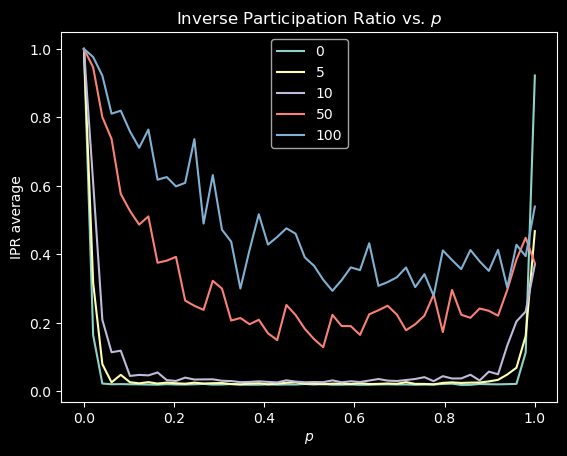

In [7]:
n = 100
psi_0 = np.zeros(n)
x = np.random.randint(n)
psi_0[x] = 1
W = 10
p = 0.1

def magto4(psi):
    newpsi = []
    for x in psi:
        newpsi.append((abs(x))**4)
    return sum(newpsi)

def localizationfordiffW(Wmax, t, p, n, psi_0, thop, num):
    Wlist = np.linspace(0, Wmax, Wmax)
    localizationmeasure = []
    for W in Wlist:
        IPRs = []
        for _ in range(num):
            torus = RandomGraph(p, n, psi_0, [-1*W, W], thop)
            psi_t = torus.solveatt(t)
            IPRs.append(magto4(psi_t))
        localizationmeasure.append(mean(IPRs)) 
    plt.xlabel("W")
    plt.ylabel("IPR average")
    plt.title("Inverse Participation Ratio of a wave function with different W energies at time "+ str(t))
    plt.plot(Wlist, localizationmeasure)

def plot_ipr_vs_p(num_pts, t, Wvals, n, psi_0, thop, num):
    p_vals = np.linspace(0, 1, num_pts)
    themeasures = []
    for W in Wvals:    
        localization_measure = []
        for p in p_vals:
            IPRs = []
            for _ in range(num):
                graph = RandomGraph(p, n, psi_0, [-W, W], thop)
                psi_t = graph.solveatt(t)
                IPRs.append(magto4(psi_t))
            localization_measure.append(mean(IPRs))
        themeasures.append(localization_measure)
    
    plt.xlabel('$p$')
    plt.ylabel('IPR average')
    plt.title('Inverse Participation Ratio vs. $p$')

    for listy in themeasures:
        plt.plot(p_vals, listy)
    
    plt.legend(Wvals)

plot_ipr_vs_p(50, 1000, [0, 5, 10, 50, 100], n, psi_0, 1, 10)


#def localizationfordiffp(num_pts, pnum, t, n, W, psi_0, thop):
    #p_vals = np.linspace(0, 1, num_ptws)

#localizationfordiffW(100, 1000, p, n, psi_0, 1, 20)